# Clustering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 1. Visegrad Group Companies Dataset

We use Visegrad Group Companies dataset for our clustering.
We first import the dataset as follows.

https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2


X1: Net profit/total assets <br/>
X2: Total liabilities/total assets <br/>
X3: Working capital/total assets <br/>
X4: Current assets/short-term liabilities <br/>
X5: Retained earnings/total assets <br/>
X6: Gross profit/total assets <br/>
X7: Book value of equity/total liabilities <br/>
X8: Net sales revenue/total assets <br/>
X9: Equity/total assets <br/>
X10: (Gross profit + financial expenses)/total assets <br/>
X11: Gross profit/short-term liabilities <br/>
X12: (Gross profit + depreciation)/sales revenues <br/>
X13: EBIT/total operating costs <br/>
X14: (Gross profit + depreciation)/total liabilities <br/>
X15: Total assets/total liabilities <br/>
X16: EBIT/total liabilities <br/>
X17: Gross profit/sales revenues <br/>
X18: EBIT/total assets <br/>
X19: Net profit/sales revenues <br/>
X20: (Equity-share capital)/total assets <br/>
X21: (Net profit + depreciation)/total liabilities <br/>
X22: EBIT/financial expenses <br/>
X23: Working capital/fixed assets <br/>
X24: Logarithm of total assets <br/>
X25: (Total liabilities-cash)/sales revenues <br/>
X26: EBIT/equity <br/>
X27: Operating expenses/short-term liabilities <br/>
X28: Operating expenses/total liabilities <br/>
X29: Profit on sales/total assets <br/>
X30: Total operating revenue/total assets <br/>
X31: (Current assets-inventories)/long-term liabilities <br/>
X32: Constant capital/total assets <br/>
X33: Profit on sales/sales revenues <br/>
X34: (Current assets-inventory-receivables)/short-term liabilities <br/>
X35: EBIT/sales revenues <br/>
X36: Net profit/inventory <br/>
X37: (Current assets-inventory)/short-term liabilities <br/>
X38: EBITDA/total assets <br/>
X39: EBITDA/sales revenues <br/>
X40: Current assets/total liabilities <br/>
X41: Short-term liabilities/total assets <br/>
X42: Equity/fixed assets <br/>
X43: Constant capital/fixed assets <br/>
X44: Working capital <br/>
X45: Net profit/equity <br/>
X46: Long-term liabilities/equity <br/>
X47: Sales revenues/inventory <br/>
X48: Sales revenues/receivables <br/>
X49: Sales revenues/short-term liabilities <br/>
X50: Sales/fixed assets <br/>
X51: (Current assets-inventory-short-term liabilities)/(total operating revenues-profit before income tax-depreciation) <br/>
X52: Net profit/net cash flow from (used in) operating activities <br/>
X53: Depreciation/net cash flow from (used in) operating activities <br/>
X54: Net cash flow from (used in) operating activities/total assets <br/>
X55: Net cash flow from (used in) operating activities/income <br/>
X56: Net cash flow from (used in) operating activities/total liabilities <br/>
X57: Net cash flow from (used in) operating activities/long-term liabilities <br/>
X58: Net cash flow from (used in) operating activities/short-term liabilities <br/>
X59: Net cash flow <br/>
X60: Net cash flow from (used in) operating activities/current assets <br/>
X61: Net cash flow from (used in) operating activities/EBIT <br/>
X62: Net profit per share <br/>
X63: Income/outstanding shares <br/>
X64: Price per share/net profit per share <br/>
X65: Yearly dividend/price per share <br/>
X66: Market capitalization/book value <br/>
X67: Market capitalization/gross profit <br/>
X68: Market capitalization/EBITDA <br/>
X69: Market capitalization to EBIT <br/>
X70: Market capitalization to total assets <br/>
X71: Market capitalization/capital employed <br/>
X72: Sales revenues (n)/sales revenues (n−1) <br/>
X73: Total sales revenue (n)/total sales revenues (n−1) <br/>
X74: Total assets (n)/total assets (n−1) <br/>
X75: Current assets (n)/current assets (n−1) <br/>
X76: EBIT (n)/EBIT (n−1) <br/>
X77: Net profit (n)/net profit (n−1) <br/>
X78: Inventory (n)/inventory (n−1) <br/>
X79: Receivables (n)/receivables (n−1) <br/>
X80: Short-term liabilities (n)/short-term liabilities (n−1) <br/>
X81: Net cash flow from (used in) operating activities (n)/Net cash flow from (used in) operating activities (n−1) <br/>
X82: Net cash flow(n)/net cash flow (n−1) <br/>

<br/>
Class Labels <br/>
(S): 1. Transportation and warehousing; 2. Wholesale trade; <br/>
3. Manufacturing; 4. Retail trade; 5. Energy; 6. Construction.


In [2]:
# Replace 'your_file.csv' with the path to your CSV file
df_full = pd.read_csv('csv_result-2019.csv', header="infer")

df_full_copy = df_full.copy()

# Display the DataFrame
df_full_copy


,id,Num,Country,X1,X2,X3,X4,X5,X6,X7,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
0,1,10,Hungary,m,m,m,m,m,m,m,...,0,0,0,m,0,0,0,m,m,1
1,2,22,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,27,Hungary,-0.04,0.83,-0.08,0.83,0,-0.03,0.21,...,0.82,0.92,1.16,110.93,0.85,0.96,0.91,m,m,1
3,4,73,Poland,0.01,0.73,0.04,1.06,0.1,0.01,0.37,...,0.87,0.82,-0.1,1.09,0.62,0.97,0.78,-1.03,1.34,1
4,5,74,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,404,Slovakia,0.05,0.09,0.03,1.52,0,0.06,10.47,...,0.94,0.88,0.85,m,m,1.04,0.79,m,m,6
446,447,423,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
447,448,427,Slovakia,-0.04,0.06,0.02,1.79,-0.78,-0.05,15.85,...,0.92,0.38,-2.07,m,m,0.63,0.56,m,m,6
448,449,432,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


### Filter to select the 10 most important attributes to measure performance of a company

to reduce the number of attributes we are working with for better visualisation

X1: Net profit/total assets — Measures profitability relative to assets. </br>
X6: Gross profit/total assets — Efficiency in using assets to generate profit.</br>
X4: Current assets/short-term liabilities — Liquidity ratio indicating the ability to cover short-term obligations.</br>
X7: Book value of equity/total liabilities — Financial leverage and ability to meet obligations with equity.</br>
X19: Net profit/sales revenues — Profitability relative to revenue.</br>
X2: Total liabilities/total assets — Leverage ratio, indicating the proportion of assets financed by debt.</br>
X13: EBIT/total operating costs — Operational efficiency indicator.</br>
X9: Equity/total assets — Shows how much of the company's assets are financed by equity.</br>
X54: Net cash flow from operating activities/total assets — Operational cash flow efficiency.</br>
X72: Sales revenues (n)/sales revenues (n−1) — Sales growth indicator.</br>

In [3]:
# Choose 10 key attributes that are most relevant for your analysis
df = df_full_copy[['id', 'Num', 'Country', 'X1', 'X2', 'X4', 'X6', 'X7', 'X9', 'X13', 'X19', 'X54', 'X72','S']]

# 2. Data Preprocessing

In [4]:

print('Number of instances = %d' % df.shape[0])
print('Number of attributes = %d' % df.shape[1])
df.head()
print(df.dtypes)

Number of instances = 450
Number of attributes = 14
id          int64
Num         int64
Country    object
X1         object
X2         object
X4         object
X6         object
X7         object
X9         object
X13        object
X19        object
X54        object
X72        object
S           int64
dtype: object


In [27]:
# Converts to float, setting non-numeric to NaN

df.loc[:, 'X1'] = pd.to_numeric(df['X1'], errors='coerce')
df.loc[:, 'X2'] = pd.to_numeric(df['X2'], errors='coerce')
df.loc[:, 'X4'] = pd.to_numeric(df['X4'], errors='coerce')
df.loc[:, 'X6'] = pd.to_numeric(df['X6'], errors='coerce')
df.loc[:, 'X7'] = pd.to_numeric(df['X7'], errors='coerce')
df.loc[:, 'X9'] = pd.to_numeric(df['X9'], errors='coerce')
df.loc[:, 'X13'] = pd.to_numeric(df['X13'], errors='coerce')
df.loc[:, 'X19'] = pd.to_numeric(df['X19'], errors='coerce')
df.loc[:, 'X54'] = pd.to_numeric(df['X54'], errors='coerce')
df.loc[:, 'X72'] = pd.to_numeric(df['X72'], errors='coerce')



df.loc[:, 'S'] = df.loc[:, 'S'].astype('category')
# Convert 'Country' to categorical
df.loc[:, 'Country'] = df.loc[:, 'Country'].astype('category')

# Check data types to confirm
print(df.dtypes)
print(df['S'].cat.categories)

id            int64
Num           int64
Country    category
X1          float64
X2          float64
X4          float64
X6          float64
X7          float64
X9          float64
X13         float64
X19         float64
X54         float64
X72         float64
S          category
dtype: object
Index([1, 2, 3, 4, 5, 6], dtype='int64')


### Missing Values


In [6]:
print('Number of instances = %d' % df.shape[0])
print('Number of attributes = %d' % df.shape[1])

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col, df[col].isna().sum()))

Number of instances = 450
Number of attributes = 14
Number of missing values:
	id: 0
	Num: 0
	Country: 0
	X1: 18
	X2: 18
	X4: 21
	X6: 18
	X7: 20
	X9: 18
	X13: 19
	X19: 33
	X54: 23
	X72: 45
	S: 0


In [7]:
print(df.head)

<bound method NDFrame.head of       id  Num   Country    X1    X2     X4    X6     X7    X9   X13     X19  \
0      1   10   Hungary   NaN   NaN    NaN   NaN    NaN   NaN   NaN     NaN   
1      2   22    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
2      3   27   Hungary -0.04  0.83   0.83 -0.03   0.21  0.17 -0.02   -0.03   
3      4   73    Poland  0.01  0.73   1.06  0.01   0.37  0.27  0.01    0.00   
4      5   74    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
..   ...  ...       ...   ...   ...    ...   ...    ...   ...   ...     ...   
445  446  404  Slovakia  0.05  0.09   1.52  0.06  10.47  0.91  0.43    0.22   
446  447  423    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
447  448  427  Slovakia -0.04  0.06   1.79 -0.05  15.85  0.94 -0.37   -0.60   
448  449  432    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
449  450  438  Slovakia -0.10  0.10  11.41 -0.10   9.05  0.90 -1.00 -115.32   

      X54   X72  S  


In [8]:
df_cleaned = df.dropna()

In [9]:
print('Number of instances = %d' % df_cleaned.shape[0])
print('Number of attributes = %d' % df_cleaned.shape[1])

print('Number of missing values:')
for col in df_cleaned.columns:
    print('\t%s: %d' % (col, df_cleaned[col].isna().sum()))

Number of instances = 385
Number of attributes = 14
Number of missing values:
	id: 0
	Num: 0
	Country: 0
	X1: 0
	X2: 0
	X4: 0
	X6: 0
	X7: 0
	X9: 0
	X13: 0
	X19: 0
	X54: 0
	X72: 0
	S: 0


In [10]:
print(df_cleaned.head)

<bound method NDFrame.head of       id  Num   Country    X1    X2     X4    X6     X7    X9   X13     X19  \
1      2   22    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
3      4   73    Poland  0.01  0.73   1.06  0.01   0.37  0.27  0.01    0.00   
4      5   74    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
5      6  100    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
6      7  139    Poland  0.07  0.58   1.25  0.09   0.72  0.42  0.02    0.02   
..   ...  ...       ...   ...   ...    ...   ...    ...   ...   ...     ...   
445  446  404  Slovakia  0.05  0.09   1.52  0.06  10.47  0.91  0.43    0.22   
446  447  423    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
447  448  427  Slovakia -0.04  0.06   1.79 -0.05  15.85  0.94 -0.37   -0.60   
448  449  432    Poland  0.00  0.00   0.00  0.00   0.00  0.00  0.00    0.00   
449  450  438  Slovakia -0.10  0.10  11.41 -0.10   9.05  0.90 -1.00 -115.32   

      X54   X72  S  


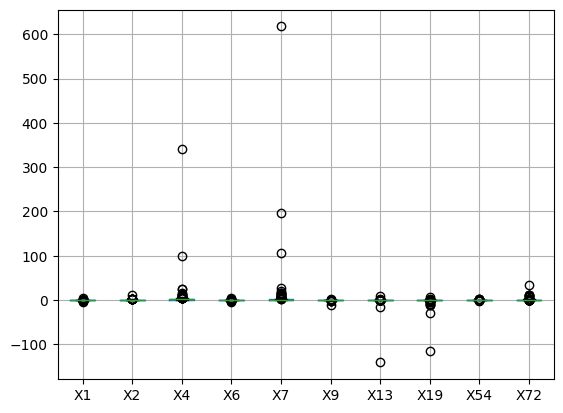

In [11]:
#drop id and Num
data2 = df_cleaned.drop(['id','Country', 'Num',"S"], axis=1)
data2

#show boxplot to detect outliers
data2.boxplot()
plt.show()

this shows that X4,X7,X72 has abnormally high values while X13,X19 has abnormally low values

In [12]:
z = (data2-data2.mean())/data2.std()
z

,X1,X2,X4,X6,X7,X9,X13,X19,X54,X72
1,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
3,0.037617,0.286389,-0.100331,-0.029228,-0.102069,-0.132668,0.049155,0.080105,-0.549771,0.018908
4,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
5,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
6,0.215317,0.069570,-0.089859,0.184603,-0.091599,0.087429,0.050534,0.083339,-0.127854,-0.059526
...,...,...,...,...,...,...,...,...,...,...
445,0.156084,-0.638707,-0.074976,0.104416,0.200060,0.806414,0.107075,0.115679,-0.163013,-0.059526
446,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
447,-0.110466,-0.682070,-0.060094,-0.189601,0.360996,0.850434,-0.003249,-0.016913,-0.163013,-0.314438
448,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035


In [28]:
df_cleaned.loc[:, 'z_score_X1'] = z['X1']
df_cleaned.loc[:, 'z_score_X2'] = z['X2']
df_cleaned.loc[:, 'z_score_X4'] = z['X4']
df_cleaned.loc[:, 'z_score_X6'] = z['X6']
df_cleaned.loc[:, 'z_score_X7'] = z['X7']
df_cleaned.loc[:, 'z_score_X9'] = z['X9']
df_cleaned.loc[:, 'z_score_X13'] = z['X13']
df_cleaned.loc[:, 'z_score_X19'] = z['X19']
df_cleaned.loc[:, 'z_score_X54'] = z['X54']
df_cleaned.loc[:, 'z_score_X72'] = z['X72']

df_cleaned


,id,Num,Country,X1,X2,X4,X6,X7,X9,X13,...,z_score_X1,z_score_X2,z_score_X4,z_score_X6,z_score_X7,z_score_X9,z_score_X13,z_score_X19,z_score_X54,z_score_X72
1,2,22,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
3,4,73,Poland,0.01,0.73,1.06,0.01,0.37,0.27,0.01,...,0.037617,0.286389,-0.100331,-0.029228,-0.102069,-0.132668,0.049155,0.080105,-0.549771,0.018908
4,5,74,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
5,6,100,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
6,7,139,Poland,0.07,0.58,1.25,0.09,0.72,0.42,0.02,...,0.215317,0.069570,-0.089859,0.184603,-0.091599,0.087429,0.050534,0.083339,-0.127854,-0.059526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,445,398,Poland,-0.19,1.32,0.76,-0.19,-0.24,-0.32,-0.15,...,-0.554716,1.139212,-0.116867,-0.563805,-0.120316,-0.998385,0.027090,0.049383,0.540182,-0.329145
445,446,404,Slovakia,0.05,0.09,1.52,0.06,10.47,0.91,0.43,...,0.156084,-0.638707,-0.074976,0.104416,0.200060,0.806414,0.107075,0.115679,-0.163013,-0.059526
446,447,423,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
447,448,427,Slovakia,-0.04,0.06,1.79,-0.05,15.85,0.94,-0.37,...,-0.110466,-0.682070,-0.060094,-0.189601,0.360996,0.850434,-0.003249,-0.016913,-0.163013,-0.314438


In [14]:
df_cleaned = df_cleaned[df_cleaned['z_score_X1'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X2'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X4'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X6'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X7'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X9'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X13'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X19'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X54'].between(-3, 3)]
df_cleaned = df_cleaned[df_cleaned['z_score_X72'].between(-3, 3)]

df_cleaned


,id,Num,Country,X1,X2,X4,X6,X7,X9,X13,...,z_score_X1,z_score_X2,z_score_X4,z_score_X6,z_score_X7,z_score_X9,z_score_X13,z_score_X19,z_score_X54,z_score_X72
1,2,22,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
3,4,73,Poland,0.01,0.73,1.06,0.01,0.37,0.27,0.01,...,0.037617,0.286389,-0.100331,-0.029228,-0.102069,-0.132668,0.049155,0.080105,-0.549771,0.018908
4,5,74,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
5,6,100,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
6,7,139,Poland,0.07,0.58,1.25,0.09,0.72,0.42,0.02,...,0.215317,0.069570,-0.089859,0.184603,-0.091599,0.087429,0.050534,0.083339,-0.127854,-0.059526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,445,398,Poland,-0.19,1.32,0.76,-0.19,-0.24,-0.32,-0.15,...,-0.554716,1.139212,-0.116867,-0.563805,-0.120316,-0.998385,0.027090,0.049383,0.540182,-0.329145
445,446,404,Slovakia,0.05,0.09,1.52,0.06,10.47,0.91,0.43,...,0.156084,-0.638707,-0.074976,0.104416,0.200060,0.806414,0.107075,0.115679,-0.163013,-0.059526
446,447,423,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.008000,-0.768798,-0.158757,-0.055957,-0.113137,-0.528844,0.047776,0.080105,-0.163013,-0.535035
447,448,427,Slovakia,-0.04,0.06,1.79,-0.05,15.85,0.94,-0.37,...,-0.110466,-0.682070,-0.060094,-0.189601,0.360996,0.850434,-0.003249,-0.016913,-0.163013,-0.314438


In [15]:
df_cleaned = df_cleaned.drop(columns=['z_score_X1', 'z_score_X2', 'z_score_X4', 'z_score_X6', 'z_score_X7', 
                                      'z_score_X9', 'z_score_X13', 'z_score_X19', 'z_score_X54', 'z_score_X72'], axis=1)

df_cleaned


,id,Num,Country,X1,X2,X4,X6,X7,X9,X13,X19,X54,X72,S
1,2,22,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
3,4,73,Poland,0.01,0.73,1.06,0.01,0.37,0.27,0.01,0.00,-0.11,1.13,1
4,5,74,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
5,6,100,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
6,7,139,Poland,0.07,0.58,1.25,0.09,0.72,0.42,0.02,0.02,0.01,0.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,445,398,Poland,-0.19,1.32,0.76,-0.19,-0.24,-0.32,-0.15,-0.19,0.20,0.42,6
445,446,404,Slovakia,0.05,0.09,1.52,0.06,10.47,0.91,0.43,0.22,0.00,0.97,6
446,447,423,Poland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6
447,448,427,Slovakia,-0.04,0.06,1.79,-0.05,15.85,0.94,-0.37,-0.60,0.00,0.45,6


In [16]:
#check any duplicated data
dups = df_cleaned.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# 3. Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into k disjoint clusters by iteratively applying the following two steps:

-Form k clusters by assigning each instance to its nearest centroid;
-Recompute the centroid of each cluster;

K-means results are easy to interpret. Each data point is assigned to a single cluster, and the centroid of each cluster represents the "average" data point for that cluster.

The Elbow Method is used to obtain the optimal number of clusters that we should consider

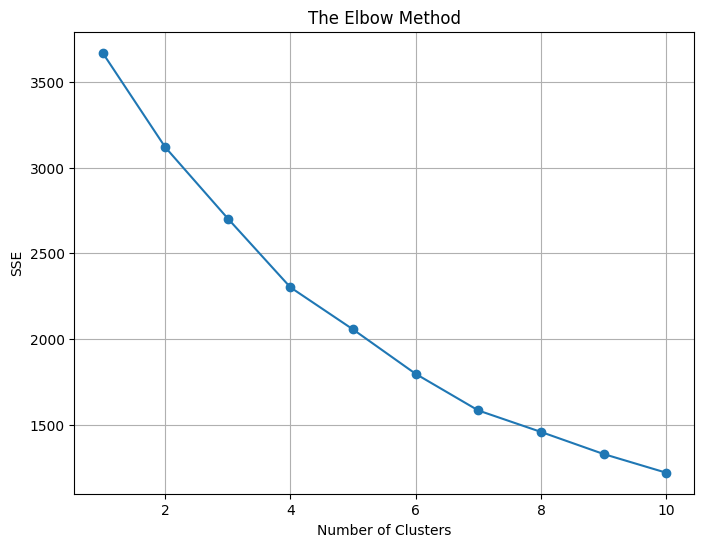

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['X1', 'X2', 'X4', 'X6', 'X7', 'X9', 'X13', 'X19', 'X54', 'X72']
data_clustering = df_cleaned[features]

# Scale the data to normalize the feature values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Determine the optimal number of clusters using the Elbow Method
numClusters = range(1, 11)  # Test from 1 to 10 clusters
SSE = []

for k in numClusters:
    k_means = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    k_means.fit(data_scaled)
    SSE.append(k_means.inertia_)  # Append the within-cluster sum of squares

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(numClusters, SSE, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


Since we did not obtain a sharp and clear elbow, we used another method: the silhouette score.

The silhouette score is a single numerical value that quantifies how well-separated the clusters are and how well each data point fits within its assigned cluster.It is calculated for each point in the dataset, and then the average score for all points is computed.

 Here, the highest peak in the plot will indicate us the optimal number of clusters.

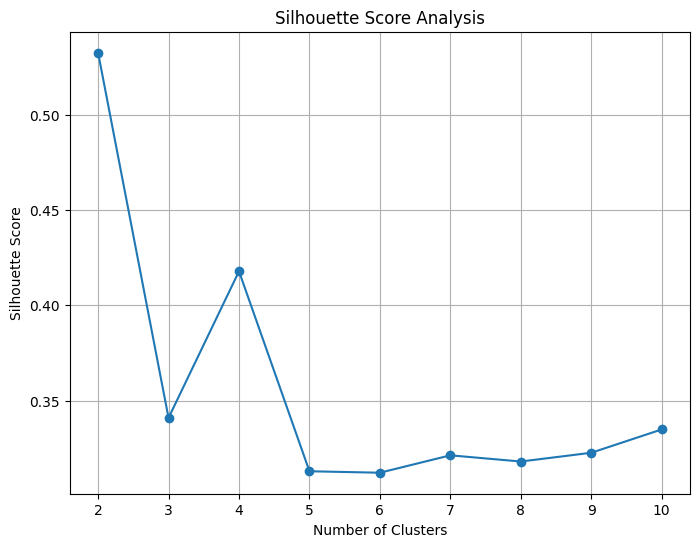

Optimal number of clusters: 2
Cluster
0          340
1           27
Name: count, dtype: int64


In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming `data_clustering` is preprocessed and scaled
features = ['X1', 'X2', 'X4', 'X6', 'X7', 'X9', 'X13', 'X19', 'X54', 'X72']
data_clustering = df_cleaned[features]  # Use preprocessed data

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Test multiple cluster sizes for silhouette scores
numClusters = range(2, 11)  # Start from 2 since silhouette score requires at least 2 clusters
silhouette_scores = []

for k in numClusters:
    k_means = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = k_means.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(numClusters, silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Choose optimal number of clusters based on silhouette score or elbow point
optimal_clusters = numClusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_clusters}")

# Implement clustering with the optimal number of clusters
k_means_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=0)
data_clustering = data_clustering.copy()  # Create an explicit copy if necessary
data_clustering.loc[:, 'Cluster'] = k_means_optimal.fit_predict(data_scaled)



# View cluster assignments
print(data_clustering[['Cluster']].value_counts())


Performing KMeans clustering with 2 clusters, as suggested by the Silhouette Score plot, using PCA (Principal Component Analysis) to reduce the number of features (dimensions) in the dataset while preserving as much variance (information) as possible. It achieves this by identifying new axes (principal components) that capture the maximum variance in the data.

Cluster distribution:
Cluster
0    340
1     27
Name: count, dtype: int64


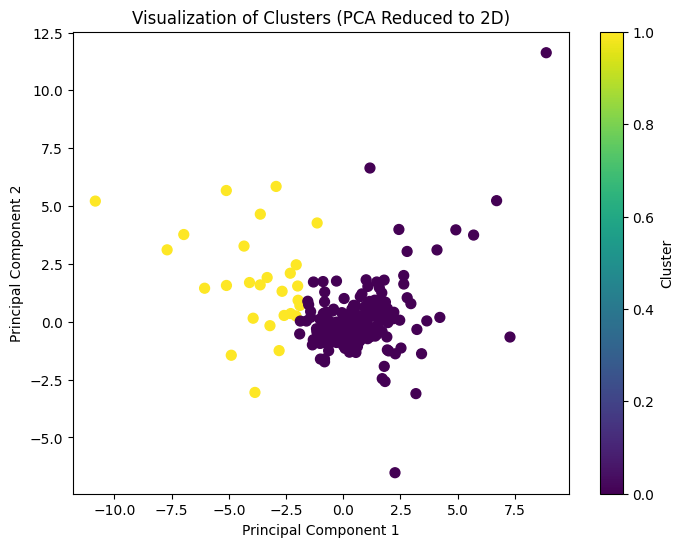

In [19]:
# Perform KMeans clustering with 2 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set optimal number of clusters
optimal_clusters = 2
k_means_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=0)

# Fit the data and predict clusters
data_clustering.loc[:, 'Cluster'] = k_means_optimal.fit_predict(data_scaled)


# Count the number of points in each cluster
print("Cluster distribution:")
print(data_clustering['Cluster'].value_counts())

# Visualize the clusters in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_clustering['Cluster'], cmap='viridis', s=50)
plt.title('Visualization of Clusters (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Since our dataset is not very large but contains several outliers, we wanted to perform also a DBSCAN clustering, to automatically handle outliers.  

Before that, we wanted to find an appropriate 'eps' value, which represents the maximum distance between two points for them to be considered as part of the same cluster. In order to achieve this, we used k-distance graph.

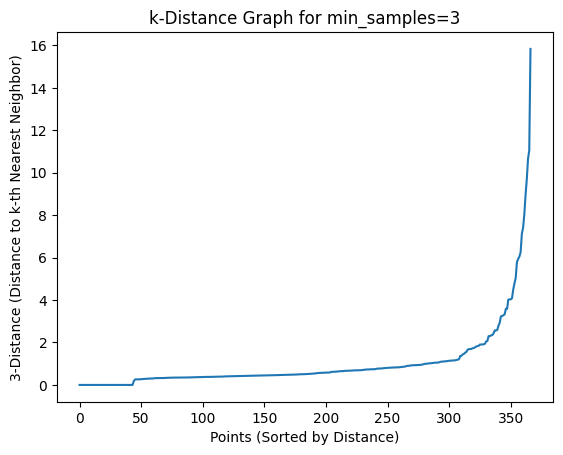

In [23]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate the k-distance graph (using min_samples as k)
k = 3  # min_samples = 3
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort distances of the k-th nearest neighbor (distance to the 3rd nearest neighbor)
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.xlabel('Points (Sorted by Distance)')
plt.ylabel(f'{k}-Distance (Distance to k-th Nearest Neighbor)')
plt.title(f'k-Distance Graph for min_samples={k}')
plt.show()



Cluster distribution:
DBSCAN_Cluster
 1    250
-1     73
 0     44
Name: count, dtype: int64


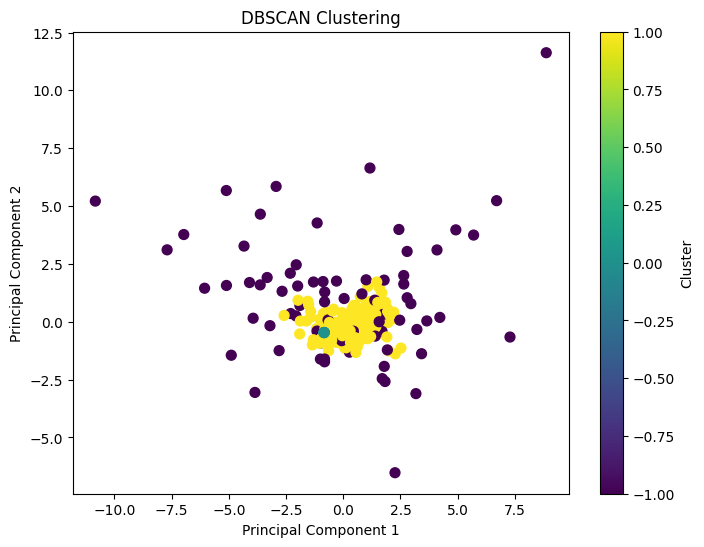

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Tune the parameters for DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)  # from k-distance graph 1 is the optimal eps
data_clustering.loc[:, 'DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Get the count of points in each cluster
cluster_counts = data_clustering['DBSCAN_Cluster'].value_counts()

# Print the number of points in each cluster
print("Cluster distribution:")
print(cluster_counts)

# Visualize the results (using PCA for dimensionality reduction)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_clustering['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



By adjusting the 'eps', we found 73 outliers (-1 cluster)

In [ ]:
Cluster Evaluation using Silhouette Score

For n_clusters = 2, The average silhouette_score is: 0.5694881325150719
For n_clusters = 3, The average silhouette_score is: 0.5335362884496354
For n_clusters = 4, The average silhouette_score is: 0.41239631715084485
For n_clusters = 5, The average silhouette_score is: 0.4213087881958073
For n_clusters = 6, The average silhouette_score is: 0.3278594976694125


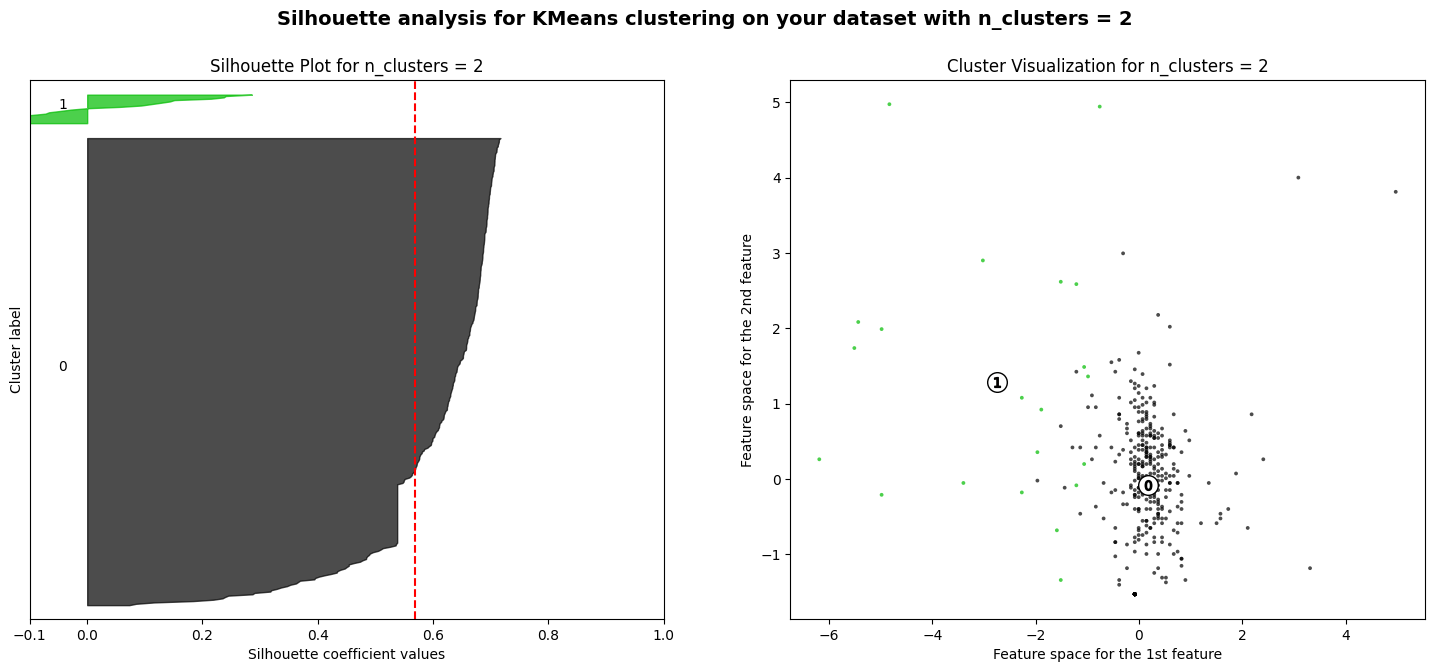

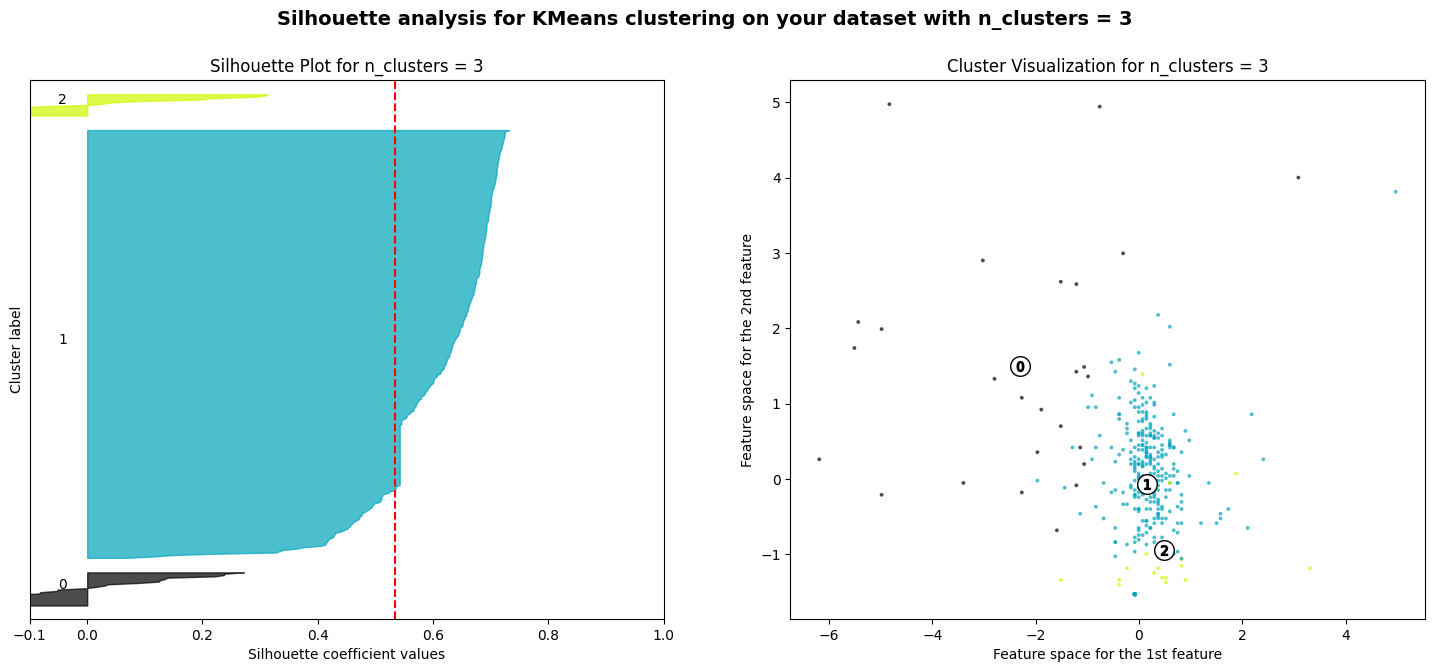

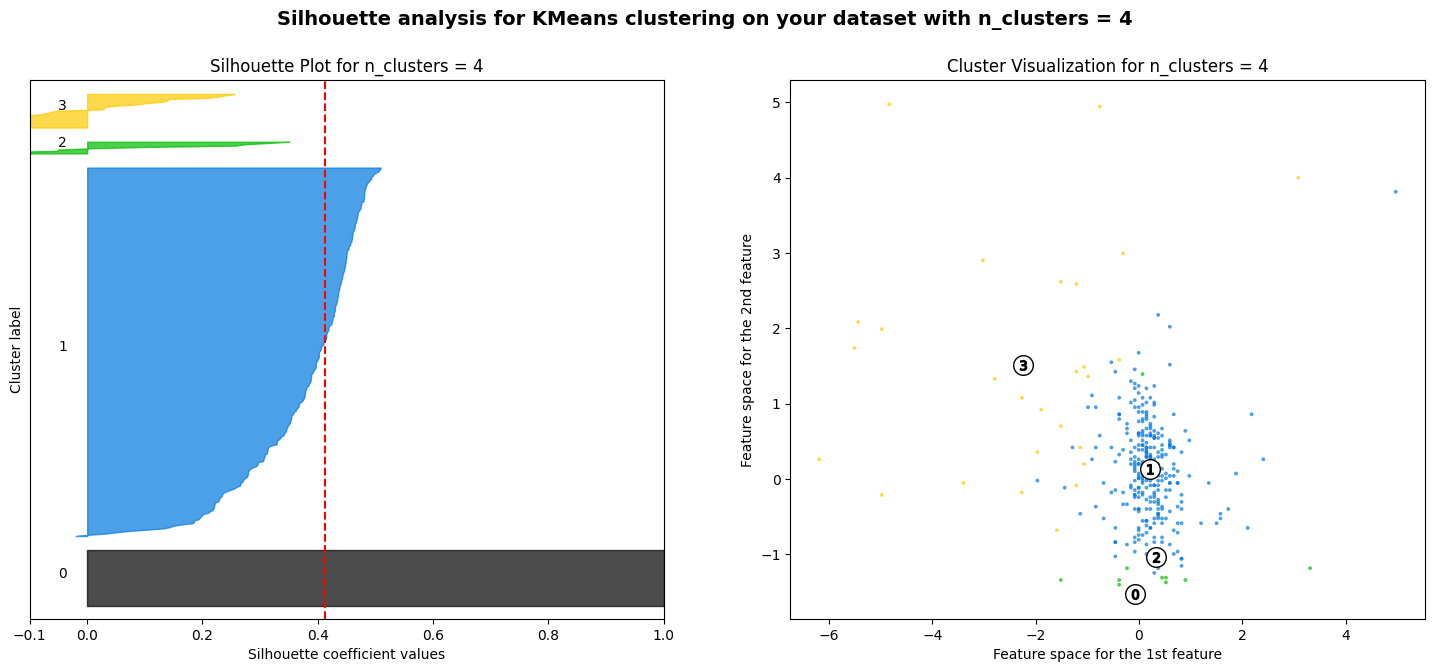

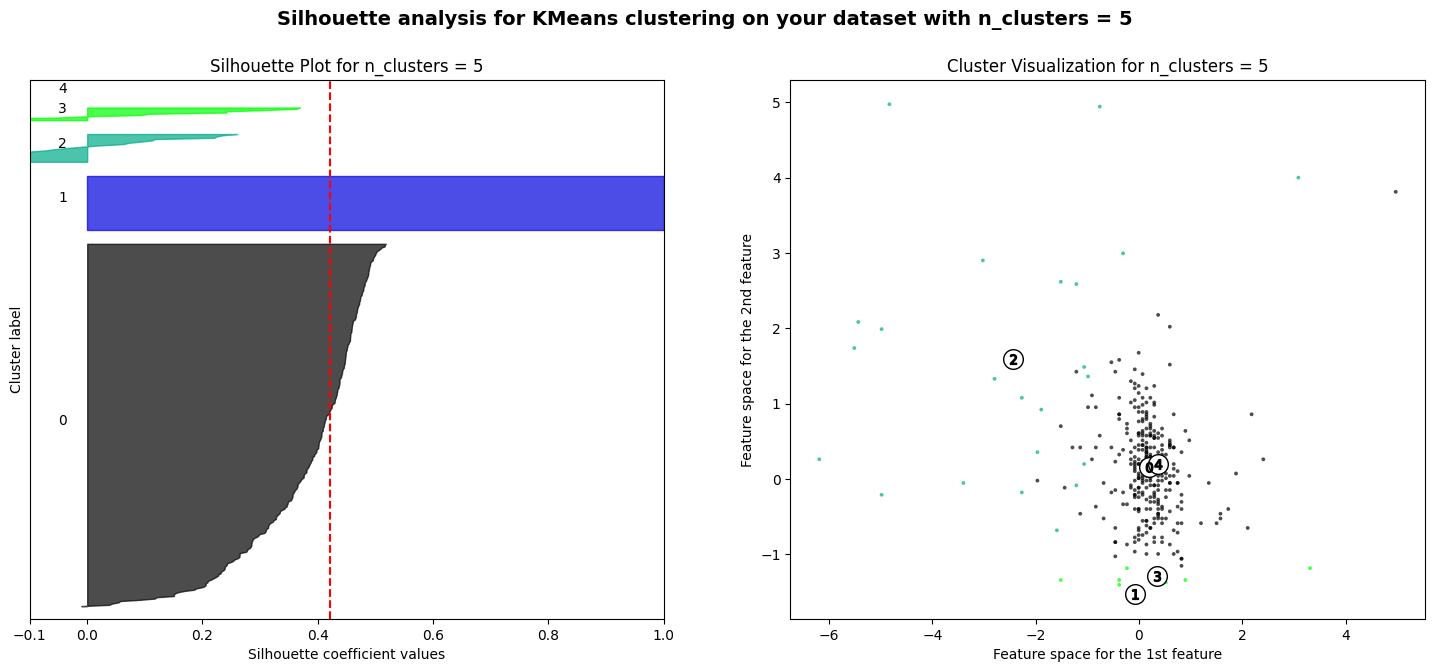

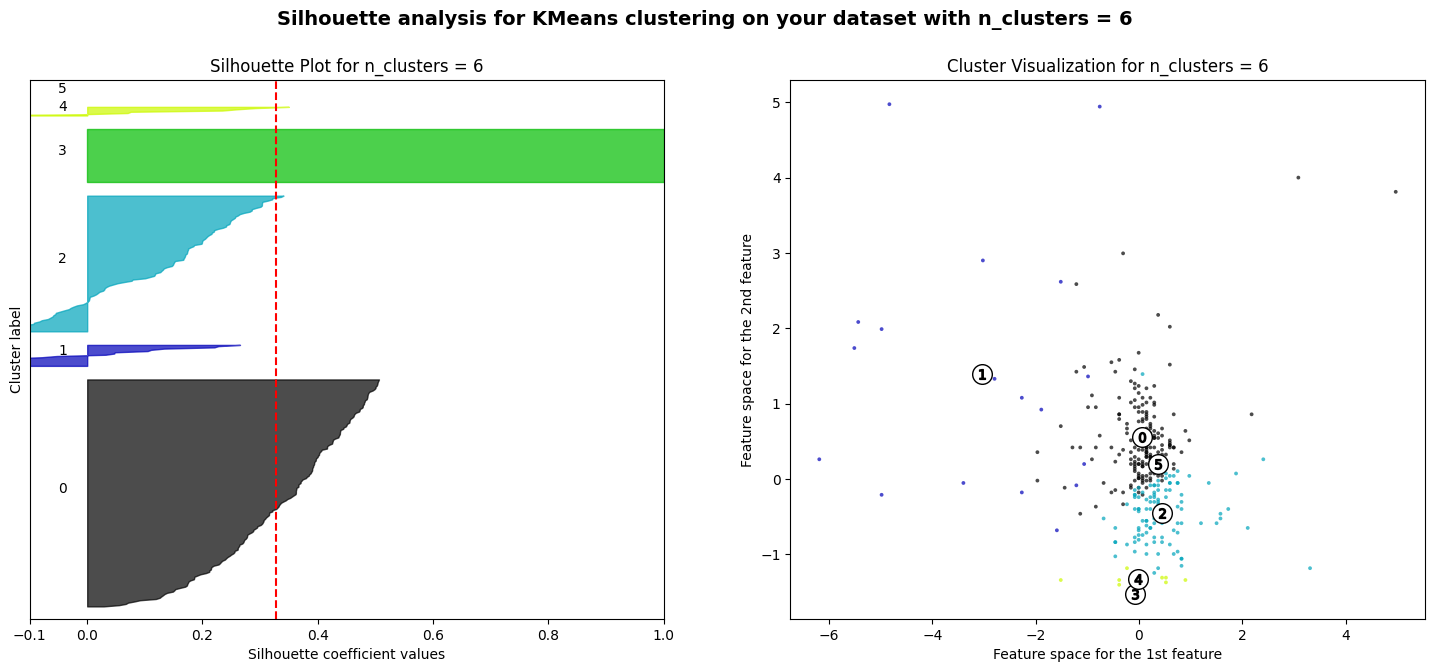

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

# Assuming 'data_scaled' is your scaled data, ready for clustering.
# Assuming 'range_n_clusters' is the range of cluster numbers you're testing.
range_n_clusters = [2, 3, 4, 5, 6]

# Visualizing the silhouette analysis for different cluster sizes
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(data_scaled)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette Plot for n_clusters = {n_clusters}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title(f"Cluster Visualization for n_clusters = {n_clusters}")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on your dataset with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')

plt.show()
